# Лабораторная работа №3
### 1. Исходные данные
**Датасет**: https://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions
<br>
**Предметная область**: Человеческая активность, различные движения
<br>**Список классов**:
1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING
7. STAND_TO_SIT
8. SIT_TO_STAND
9. SIT_TO_LIE
10. LIE_TO_SIT
11. STAND_TO_LIE
12. LIE_TO_STAND

**Количество атрибутов**: 561
<br>
**Основные атрибуты**: Измерения гироскопа и акселерометра в 3х осях, фильтры их значений
<br>
**Полный список атрибутов**: Features.txt
### 2. Ход работы
#### 1. Исходный код


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import utils
from data import Data


def visualize_data(data, classes):

    plt.figure(figsize=(8, 6))
    classNames = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING',
                             'STAND_TO_SIT', 'SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']
    colors = ['crimson', 'lightblue', 'darkgreen', 'gray', 'orange', 'black', 'lightgreen', 'violet',
                             'yellow', 'green', 'blue', 'red']

    for classNumber in np.unique(classes):
        classNumber = int(classNumber)
        R = pearsonr(data[:, 9][classes == classNumber], data[:, 10][classes == classNumber])
        plt.scatter(x=data[:, 9][classes == classNumber],
                    y=data[:, 10][classes == classNumber],
                    color=colors[classNumber-1],
                    alpha=0.7,
                    label='{:}, R={:.2f}'.format(classNames[classNumber-1], R[0])
                    )

    plt.title('Image Segmentation data visualization')
    plt.xlabel('tBodyAcc-Max-x')
    plt.ylabel('tBodyAcc-Max-y')
    plt.legend(loc='best')

    plt.show()


def visualize_3d_data(data, classes):

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    classNames = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING',
                  'STAND_TO_SIT', 'SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']
    colors = ['crimson', 'lightblue', 'darkgreen', 'gray', 'orange', 'black', 'lightgreen', 'violet',
              'yellow', 'green', 'blue', 'red']

    for classNumber in np.unique(classes):
        classNumber = int(classNumber)
        ax.scatter(data[:, 9][classes == classNumber],
                    data[:, 10][classes == classNumber],
                    data[:, 11][classes == classNumber],
                    s=10,
                    color=colors[classNumber - 1],
                    alpha=0.7,
                    label=classNames[classNumber - 1]
                    )

    ax.set_xlabel('tBodyAcc-Max-x')
    ax.set_ylabel('tBodyAcc-Max-y')
    ax.set_zlabel('tBodyAcc-Max-z')
    plt.legend(loc='best')
    plt.title('Body accelerometer data visualization')

    plt.show()


def visualize_lda(data, classes):
    lda_clf = LDA()
    lda_transform = lda_clf.fit(data.train_data, data.train_classes).transform(data.train_data)

    colors = ['crimson', 'lightblue', 'darkgreen', 'gray', 'orange', 'black', 'lightgreen', 'violet',
              'yellow', 'green', 'blue', 'red']

    classNames = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING',
                  'STAND_TO_SIT', 'SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']


    plt.figure()
    for classNumber in np.unique(classes):
        classNumber = int(classNumber)
        plt.scatter(lda_transform[data.train_classes == classNumber, 2], lda_transform[data.train_classes == classNumber, 1],
                    alpha=.8, color=colors[classNumber-1],
                    label=classNames[classNumber-1])
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA of Human Activities dataset')

    plt.show()


def test_lda(data):
    lda_clf = LDA()
    lda_clf.fit(data.train_data, data.train_classes)

    lda_predict = lda_clf.predict(data.train_data)
    print('LDA')
    print('Classification accuracy for train data = {:.2%}'.format(metrics.accuracy_score(data.train_classes, lda_predict)))

    test_result = lda_clf.predict(data.test_data)

    print('Classification accuracy for test data =  {:.2%}'.format(metrics.accuracy_score(data.test_classes, test_result)))


def test_qda(data):
    qda_clf = QDA()
    qda_clf.fit(data.train_data, data.train_classes)

    qda_predict = qda_clf.predict(data.train_data)
    print('QDA')
    print('Classification accuracy for train data = {:.2%}'.format(metrics.accuracy_score(data.train_classes, qda_predict)))

    test_result = qda_clf.predict(data.test_data)

    print('Classification accuracy for test data = {:.2%}'.format(metrics.accuracy_score(data.test_classes, test_result)))


def main():
    file_data, file_classes = utils.load_data()
    visualize_data(file_data, file_classes)
    visualize_3d_data(file_data, file_classes)

    data = Data(file_data, file_classes, 1,  0.7)
    visualize_lda(data, file_classes)
    test_lda(data)
    test_qda(data)

main()

В методе visualize_data визуализируем по двум признакам - значение акселерометра по X и Y координатам
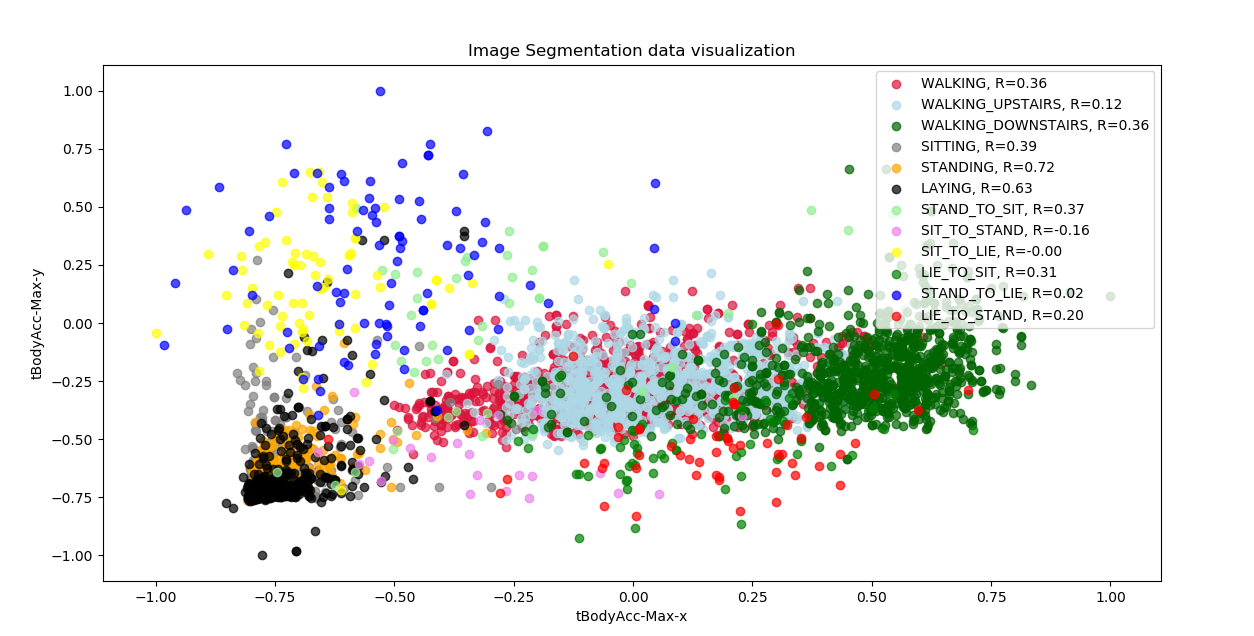

Также для большей наглядности визуализируем в методе visualize_3d_data по 3 признакам - значение акселерометра в X,Y,Z координатах
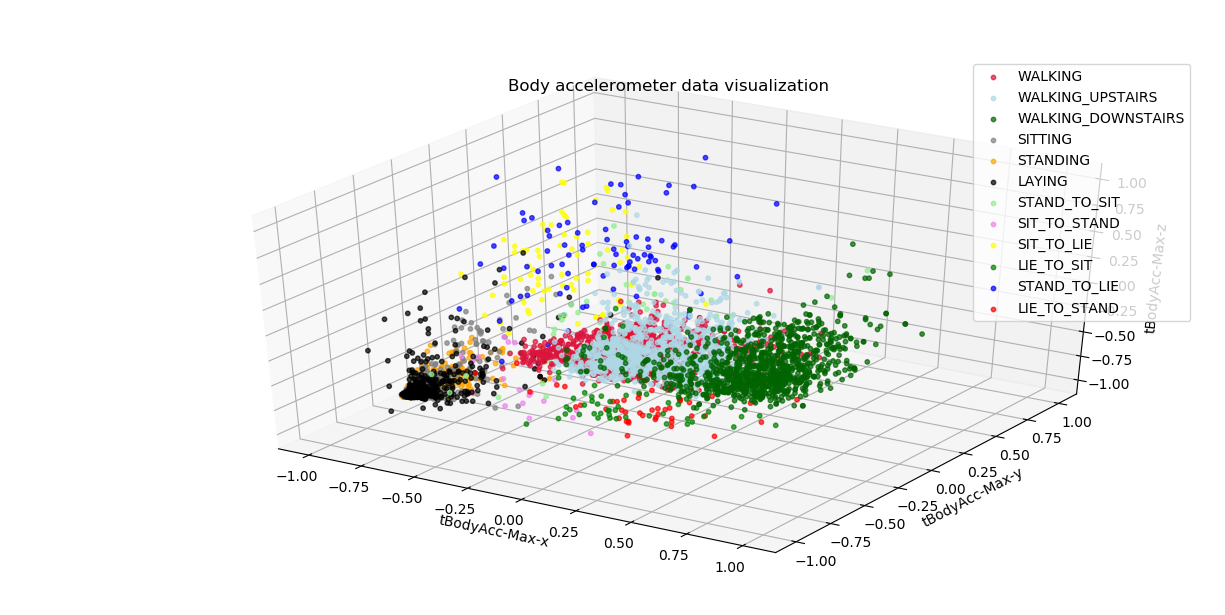

Выполним разбиение классов с помощью LDA и осуществим визуализацию в методе visualize_lda
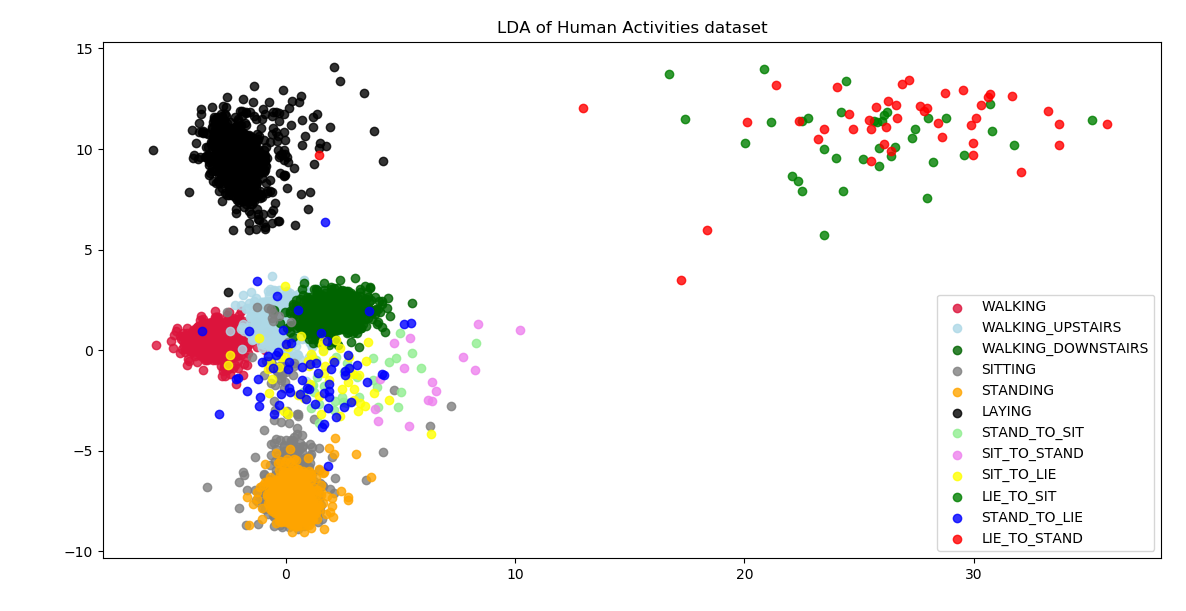

Осуществим классификацию с помощью метода **LDA**:
<br>
LDA<br>
Classification accuracy for train data = 98.42%<br>
Classification accuracy for test data =  96.53%
<br>
<br>
Осуществим классификацию с помощью метода **QDA**:<br>
QDA<br>
Classification accuracy for train data = 99.28%<br>
Classification accuracy for test data = 85.84%

### Вывод
На данном датасете точность классификации на тестовых даннах оказалась выше на методе **LDA**